#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
import cv2
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  
from scipy.spatial import distance 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
import cv2  

# Reading the image plaksha_Faculty.jpg
img = cv2.imread("C:\sem4\MLPR\Plaksha_Faculty.jpg")

# Check if the image is loaded correctly
if img is None:
    raise FileNotFoundError("Error: Image not found. Check the file path.")

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Check if the classifier loaded correctly
if face_cascade.empty():
    raise IOError("Error: Haar cascade XML file not found.")

# Applying the face detection method on the grayscale image.  
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25, 25), maxSize=(50, 50))

# Define the text and font parameters
text = "Face"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0, 0, 255)
font_thickness = 1

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.putText(img, text, (x, y - 5), font, font_scale, font_color, font_thickness)

# Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


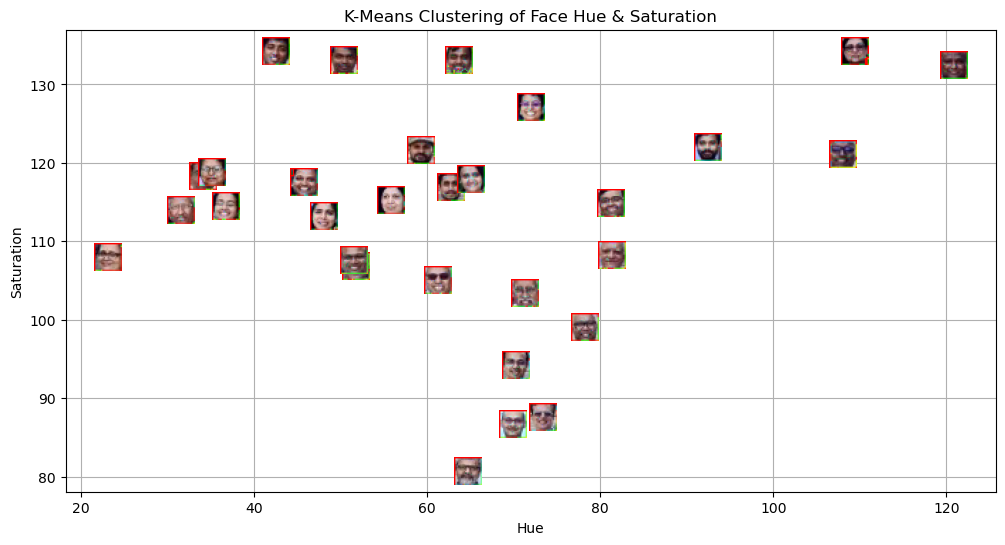

In [4]:
# Convert the image from BGR to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # Corrected placeholder

hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering on hue_saturation
kmeans = KMeans(n_clusters=3, random_state=42).fit(hue_saturation)  # Corrected placeholder
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], marker='o', markersize=5, label=f"Cluster {labels[i]}")

# Put x label
plt.xlabel("Hue")
# Put y label
plt.ylabel("Saturation")
# Put title
plt.title("K-Means Clustering of Face Hue & Saturation")
# Put grid
plt.grid(True)
# Show the plot
plt.show()


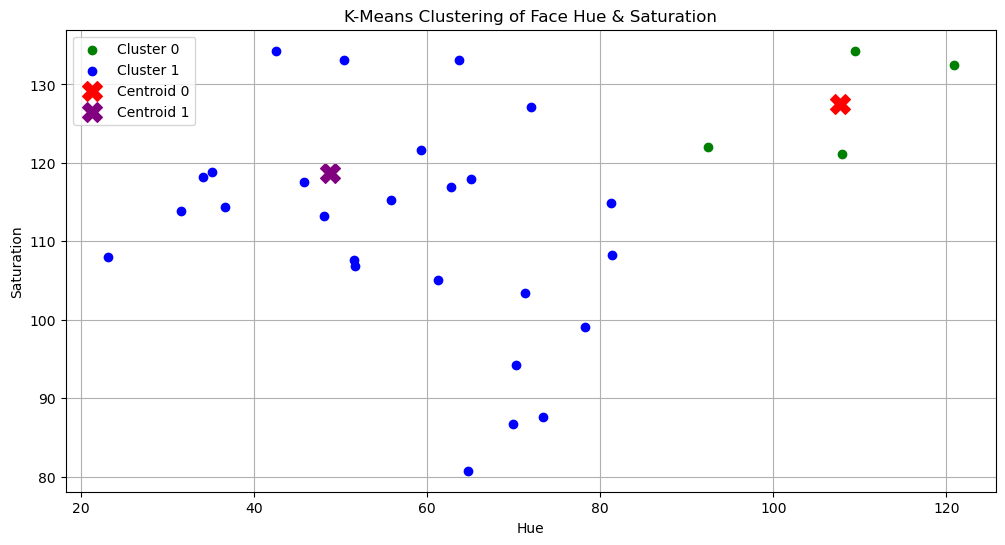

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Convert lists to NumPy arrays
cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0")

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1")

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both centroids
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='X', s=200, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], color='purple', marker='X', s=200, label="Centroid 1")

# Put x label
plt.xlabel("Hue")
# Put y label
plt.ylabel("Saturation")
# Put title
plt.title("K-Means Clustering of Face Hue & Saturation")
# Add a legend
plt.legend()
# Add grid
plt.grid(True)
# Show the plot
plt.show()


In [6]:
# Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("C:\sem4\MLPR\Dr_Shashi_Tharoor.jpg")

# Check if the template image is loaded correctly
if template_img is None:
    raise FileNotFoundError("Error: Template image not found. Check the file path.")

# Convert the template image to grayscale
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

# Detect face in the template image after converting it to gray and store it in template_faces
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.05, minNeighbors=4, minSize=(25, 25), maxSize=(300, 300))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the image with detected faces
cv2.imshow("Detected Faces in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


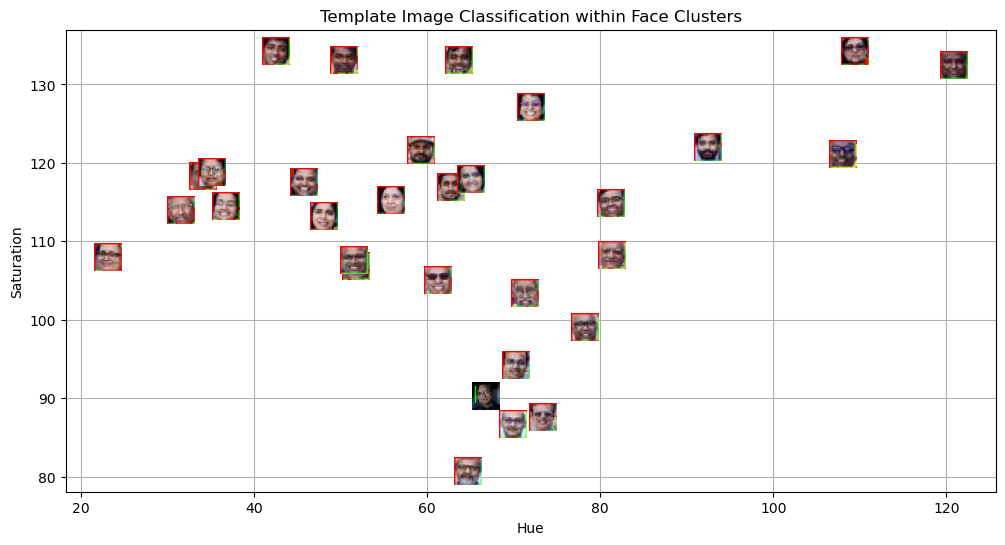

In [7]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did for detected faces
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
color = 'red' if template_label == 0 else 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

# Put x label
plt.xlabel("Hue")
# Put y label
plt.ylabel("Saturation")
# Put title
plt.title("Template Image Classification within Face Clusters")
# Add grid
plt.grid(True)
# Show plot
plt.show()


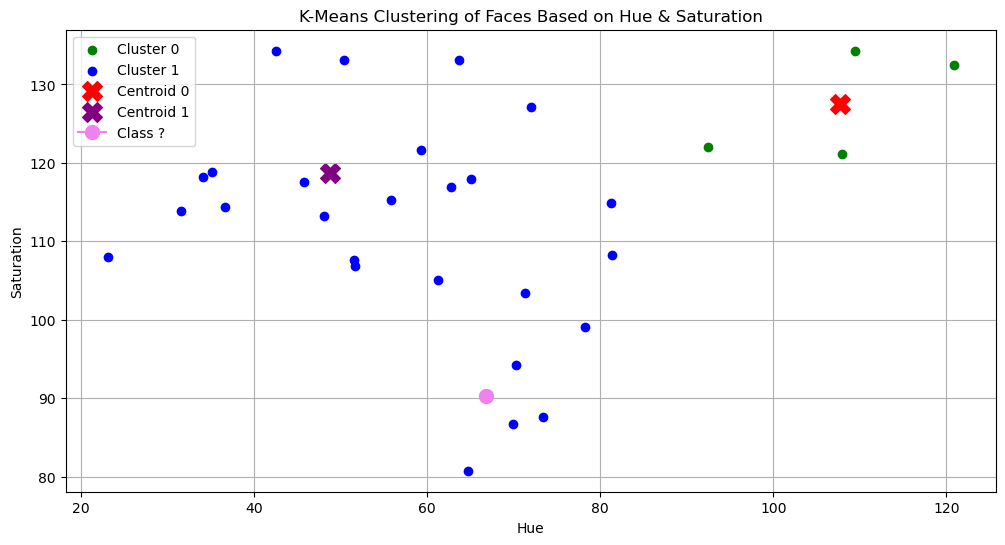

In [8]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Convert lists to NumPy arrays
cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0")

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1")

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot centroid 0 in red
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='X', s=200, label="Centroid 0")

# Plot centroid 1 in purple
plt.scatter(centroid_1[0], centroid_1[1], color='purple', marker='X', s=200, label="Centroid 1")

# Plot template image classification point in violet
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

# Put x label
plt.xlabel("Hue")
# Put y label
plt.ylabel("Saturation")
# Put title
plt.title("K-Means Clustering of Faces Based on Hue & Saturation")
# Add a legend
plt.legend()
# Add grid
plt.grid(True)
# Show the plot
plt.show()

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

    Euclidean Distance: Measures the straight-line distance between two points in space.
    
    Manhattan Distance: It sums the absolute differences of the coordinates.
    
    Minkowski Distance: A metric that includes both Euclidean and Manhattan distances.
    
    Chebyshev Distance: Measures the maximum absolute difference in any one dimension.

#### 2. What are some real-world applications of distance-based classification algorithms? 

    Image Recognition: Used in facial recognition, handwriting recognition, and object detection.
    
    Medical Diagnosis: Helps classify diseases based on symptoms and historical data.
    
    Document Classification: Categorizes emails, articles, and other text data.
    
    Genomics & Bioinformatics: Classifies gene sequences based on similarity.
    
    Customer Segmentation: Groups customers based on purchasing patterns.

#### 3. Explain various distance metrics. 

    Euclidean Distance
    Measures straight-line distance between points. Can measure distance in 360 degrees. 

    Manhattan Distance
    Measures distance along grid-like paths. Can only measure in 4 directions.

    Minkowski Distance
    A generalization of Euclidean and Manhattan distances. Based on metric which can be changed, making it versetile.

    Chebyshev Distance
    Measures maximum absolute difference along any one dimension.

#### 4. What is the role of cross validation in model performance? 

    Cross-validation helps evaluate a model’s generalization and precision ability by splitting data into multiple training and testing sets.

#### 5. Explain variance and bias in terms of KNN? 

    High Bias (Large K) : Underfitting, ignores details
    High Variance (Small K) : Overfitting, too sensitive to noise
    Low Bias & Low Variance (Optimal K) : Good balance, generalizes well to unseen data.